# Character Recognition Model

## Importing Dependencies

In [106]:
import glob
import cv2 as cv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [107]:
# get images whose frames are available
images=[]
img_names=[]
borders=[]
for path_string in glob.iglob('./train_bbxs/*txt'):
    borders.append(open(path_string,'r').read().splitlines())
    img_name = path_string[13:].split('.')[0]
    img_names.append(img_name)
    current_img = cv.imread('./train_images/'+img_name+'.jpg')
    images.append(cv.cvtColor(current_img,cv.COLOR_BGR2GRAY))

In [3]:
labels=pd.read_csv('./train_labels.csv')
train_data=pd.DataFrame({
    'img_name':[],
    'label':[]
})

for i in range(len(img_names)):
    img_number = int(img_names[i])
    train_data.loc[i] = [labels['img_name'][img_number],labels['label'][img_number]]
print(train_data)

       img_name   label
0     00000.jpg  اظش029
1     00001.jpg     لل1
2     00002.jpg   ثصش55
3     00003.jpg  ثغد252
4     00004.jpg  شفب334
...         ...     ...
4978  05274.jpg    كث09
4979  05275.jpg    خح49
4980  05276.jpg    لج14
4981  05277.jpg   ضت874
4982  05278.jpg   تطم93

[4983 rows x 2 columns]


In [4]:
# crop the images
# 2d array
cropped_images = []
for i,boxes in enumerate(borders):
    for box in boxes:
        points = box.split(',')
        #these are the 4 points defining the border of a character
        x1=int(points[0])
        y1=int(points[1])
        x2=int(points[2])
        y2=int(points[3]) 
        cropped_images.append(images[i][y1:y2,x1:x2])

In [5]:
result=[]
for label in train_data['label']:
    characters=label
    for i in range(len(characters)):
        result.append(characters[i])


In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
data_path =os.path.join(os.getcwd() , "data")
if not os.path.exists(data_path):
    os.makedirs(data_path)

    
def generate_images(dataPath):
    
    alphabetlist = {
        "ا": 0,
        "ب": 1,
        "ت": 2,
        "ث": 3,
        "ج": 4,
        "ح": 5,
        "خ": 6,
        "د": 7,
        "ذ": 8,
        "ر": 9,
        "ز": 10,
        "س": 11,
        "ش": 12,
        "ص": 13,
        "ض": 14,
        "ط": 15,
        "ظ": 16,
        "ع": 17,
        "غ": 18,
        "ف": 19,
        "ق": 20,
        "ك": 21,
        "ل": 22,
        "م": 23,
        "ن": 24,
        "ه": 25,
        "و": 26,
        "ى": 27,
        "0": 28,
        "1": 29,
        "2": 30,
        "3": 31,
        "4": 32,
        "5": 33,
        "6": 34,
        "7": 35,
        "8": 36,
        "9": 37,
    }

    for idx in range(len(alphabetlist)):
        os.makedirs("{}/{}".format(dataPath, idx), exist_ok=True)
    for i in range (len(result)):     
        img = cropped_images[i]
#         print(alphabetlist[result[i]])
        path = f"./data/{alphabetlist[result[i]]}"
        if not os.path.exists(path):
            os.makedirs(str(alphabetlist[result[i]]))
        try:
            
            cv.imwrite(path+f"/{i}.jpg", img,[cv.IMREAD_GRAYSCALE])
            print("Success",path+f"/{i}.jpg")
        except:
            print("Error",path+f"/{i}.jpg")
            
generate_images(data_path)

Success ./data/0/0.jpg
Success ./data/16/1.jpg
Success ./data/12/2.jpg
Success ./data/28/3.jpg
Success ./data/30/4.jpg
Success ./data/37/5.jpg
Success ./data/22/6.jpg
Success ./data/22/7.jpg
Success ./data/29/8.jpg
Success ./data/3/9.jpg
Success ./data/13/10.jpg
Success ./data/12/11.jpg
Success ./data/33/12.jpg
Success ./data/33/13.jpg
Success ./data/3/14.jpg
Success ./data/18/15.jpg
Success ./data/7/16.jpg
Success ./data/30/17.jpg
Success ./data/33/18.jpg
Success ./data/30/19.jpg
Success ./data/12/20.jpg
Success ./data/19/21.jpg
Success ./data/1/22.jpg
Success ./data/31/23.jpg
Success ./data/31/24.jpg
Success ./data/32/25.jpg
Success ./data/2/26.jpg
Success ./data/2/27.jpg
Success ./data/29/28.jpg
Success ./data/28/29.jpg
Success ./data/34/30.jpg
Success ./data/29/31.jpg
Success ./data/18/32.jpg
Success ./data/17/33.jpg
Success ./data/23/34.jpg
Success ./data/30/35.jpg
Success ./data/11/36.jpg
Success ./data/18/37.jpg
Success ./data/8/38.jpg
Success ./data/29/39.jpg
Success ./data/35/

Success ./data/13/491.jpg
Success ./data/17/492.jpg
Success ./data/37/493.jpg
Success ./data/32/494.jpg
Success ./data/16/495.jpg
Success ./data/22/496.jpg
Success ./data/15/497.jpg
Success ./data/28/498.jpg
Success ./data/28/499.jpg
Success ./data/36/500.jpg
Success ./data/34/501.jpg
Success ./data/10/502.jpg
Success ./data/15/503.jpg
Success ./data/37/504.jpg
Success ./data/33/505.jpg
Success ./data/11/506.jpg
Success ./data/21/507.jpg
Success ./data/4/508.jpg
Success ./data/35/509.jpg
Success ./data/31/510.jpg
Success ./data/31/511.jpg
Success ./data/35/512.jpg
Success ./data/8/513.jpg
Success ./data/9/514.jpg
Success ./data/23/515.jpg
Success ./data/34/516.jpg
Success ./data/35/517.jpg
Error ./data/31/518.jpg
Success ./data/17/519.jpg
Success ./data/5/520.jpg
Success ./data/36/521.jpg
Success ./data/37/522.jpg
Success ./data/3/523.jpg
Success ./data/13/524.jpg
Success ./data/19/525.jpg
Success ./data/35/526.jpg
Success ./data/29/527.jpg
Success ./data/32/528.jpg
Success ./data/32/5

Success ./data/9/1043.jpg
Success ./data/16/1044.jpg
Success ./data/31/1045.jpg
Error ./data/29/1046.jpg
Success ./data/6/1047.jpg
Success ./data/27/1048.jpg
Success ./data/29/1049.jpg
Success ./data/11/1050.jpg
Success ./data/7/1051.jpg
Success ./data/28/1052.jpg
Success ./data/12/1053.jpg
Success ./data/22/1054.jpg
Success ./data/32/1055.jpg
Success ./data/37/1056.jpg
Success ./data/1/1057.jpg
Success ./data/12/1058.jpg
Success ./data/22/1059.jpg
Success ./data/30/1060.jpg
Success ./data/28/1061.jpg
Success ./data/34/1062.jpg
Error ./data/29/1063.jpg
Success ./data/5/1064.jpg
Success ./data/12/1065.jpg
Success ./data/11/1066.jpg
Success ./data/35/1067.jpg
Success ./data/31/1068.jpg
Success ./data/32/1069.jpg
Success ./data/32/1070.jpg
Success ./data/3/1071.jpg
Success ./data/20/1072.jpg
Success ./data/11/1073.jpg
Success ./data/29/1074.jpg
Success ./data/23/1075.jpg
Success ./data/8/1076.jpg
Success ./data/37/1077.jpg
Success ./data/30/1078.jpg
Success ./data/35/1079.jpg
Success ./da

Success ./data/30/1570.jpg
Success ./data/33/1571.jpg
Success ./data/0/1572.jpg
Success ./data/10/1573.jpg
Success ./data/32/1574.jpg
Success ./data/30/1575.jpg
Success ./data/28/1576.jpg
Success ./data/7/1577.jpg
Success ./data/24/1578.jpg
Success ./data/28/1579.jpg
Success ./data/35/1580.jpg
Success ./data/35/1581.jpg
Success ./data/34/1582.jpg
Success ./data/18/1583.jpg
Success ./data/18/1584.jpg
Success ./data/28/1585.jpg
Success ./data/29/1586.jpg
Success ./data/34/1587.jpg
Error ./data/29/1588.jpg
Success ./data/4/1589.jpg
Success ./data/9/1590.jpg
Success ./data/35/1591.jpg
Success ./data/29/1592.jpg
Success ./data/37/1593.jpg
Success ./data/14/1594.jpg
Success ./data/9/1595.jpg
Success ./data/26/1596.jpg
Success ./data/36/1597.jpg
Success ./data/30/1598.jpg
Success ./data/9/1599.jpg
Success ./data/25/1600.jpg
Success ./data/9/1601.jpg
Success ./data/36/1602.jpg
Success ./data/30/1603.jpg
Success ./data/35/1604.jpg
Success ./data/35/1605.jpg
Success ./data/4/1606.jpg
Success ./d

Success ./data/30/2072.jpg
Success ./data/12/2073.jpg
Success ./data/5/2074.jpg
Success ./data/9/2075.jpg
Success ./data/33/2076.jpg
Success ./data/12/2077.jpg
Success ./data/2/2078.jpg
Success ./data/17/2079.jpg
Success ./data/31/2080.jpg
Success ./data/30/2081.jpg
Success ./data/20/2082.jpg
Success ./data/2/2083.jpg
Success ./data/22/2084.jpg
Success ./data/36/2085.jpg
Success ./data/30/2086.jpg
Success ./data/36/2087.jpg
Success ./data/3/2088.jpg
Success ./data/13/2089.jpg
Success ./data/36/2090.jpg
Success ./data/33/2091.jpg
Success ./data/32/2092.jpg
Success ./data/35/2093.jpg
Success ./data/8/2094.jpg
Success ./data/24/2095.jpg
Success ./data/37/2096.jpg
Success ./data/30/2097.jpg
Success ./data/1/2098.jpg
Success ./data/5/2099.jpg
Success ./data/35/2100.jpg
Success ./data/32/2101.jpg
Error ./data/32/2102.jpg
Success ./data/14/2103.jpg
Success ./data/21/2104.jpg
Success ./data/22/2105.jpg
Success ./data/35/2106.jpg
Success ./data/29/2107.jpg
Success ./data/9/2108.jpg
Success ./da

Success ./data/36/2509.jpg
Success ./data/37/2510.jpg
Success ./data/35/2511.jpg
Success ./data/30/2512.jpg
Success ./data/26/2513.jpg
Success ./data/3/2514.jpg
Success ./data/0/2515.jpg
Success ./data/37/2516.jpg
Success ./data/30/2517.jpg
Success ./data/37/2518.jpg
Success ./data/14/2519.jpg
Success ./data/8/2520.jpg
Success ./data/26/2521.jpg
Success ./data/37/2522.jpg
Success ./data/29/2523.jpg
Success ./data/30/2524.jpg
Success ./data/10/2525.jpg
Success ./data/26/2526.jpg
Success ./data/16/2527.jpg
Success ./data/31/2528.jpg
Success ./data/29/2529.jpg
Success ./data/33/2530.jpg
Success ./data/18/2531.jpg
Success ./data/17/2532.jpg
Success ./data/21/2533.jpg
Success ./data/28/2534.jpg
Success ./data/35/2535.jpg
Success ./data/36/2536.jpg
Success ./data/33/2537.jpg
Success ./data/6/2538.jpg
Success ./data/12/2539.jpg
Success ./data/12/2540.jpg
Success ./data/29/2541.jpg
Success ./data/28/2542.jpg
Success ./data/29/2543.jpg
Success ./data/32/2544.jpg
Success ./data/3/2545.jpg
Succes

Success ./data/1/2961.jpg
Success ./data/8/2962.jpg
Success ./data/37/2963.jpg
Success ./data/33/2964.jpg
Success ./data/30/2965.jpg
Success ./data/10/2966.jpg
Success ./data/2/2967.jpg
Success ./data/20/2968.jpg
Success ./data/30/2969.jpg
Success ./data/30/2970.jpg
Success ./data/32/2971.jpg
Success ./data/30/2972.jpg
Success ./data/4/2973.jpg
Success ./data/21/2974.jpg
Success ./data/6/2975.jpg
Success ./data/34/2976.jpg
Success ./data/34/2977.jpg
Success ./data/34/2978.jpg
Error ./data/29/2979.jpg
Success ./data/25/2980.jpg
Success ./data/18/2981.jpg
Success ./data/30/2982.jpg
Success ./data/37/2983.jpg
Success ./data/37/2984.jpg
Success ./data/23/2985.jpg
Success ./data/9/2986.jpg
Success ./data/2/2987.jpg
Success ./data/29/2988.jpg
Success ./data/29/2989.jpg
Success ./data/30/2990.jpg
Success ./data/14/2991.jpg
Success ./data/7/2992.jpg
Success ./data/36/2993.jpg
Success ./data/32/2994.jpg
Success ./data/10/2995.jpg
Success ./data/4/2996.jpg
Success ./data/3/2997.jpg
Success ./dat

Success ./data/34/3412.jpg
Success ./data/31/3413.jpg
Success ./data/34/3414.jpg
Success ./data/11/3415.jpg
Success ./data/19/3416.jpg
Success ./data/36/3417.jpg
Success ./data/29/3418.jpg
Success ./data/28/3419.jpg
Success ./data/11/3420.jpg
Success ./data/4/3421.jpg
Success ./data/18/3422.jpg
Success ./data/34/3423.jpg
Success ./data/30/3424.jpg
Success ./data/37/3425.jpg
Success ./data/29/3426.jpg
Success ./data/25/3427.jpg
Success ./data/1/3428.jpg
Success ./data/25/3429.jpg
Success ./data/34/3430.jpg
Success ./data/28/3431.jpg
Success ./data/28/3432.jpg
Error ./data/35/3433.jpg
Success ./data/6/3434.jpg
Success ./data/7/3435.jpg
Success ./data/12/3436.jpg
Success ./data/35/3437.jpg
Success ./data/37/3438.jpg
Success ./data/34/3439.jpg
Success ./data/2/3440.jpg
Success ./data/0/3441.jpg
Success ./data/29/3442.jpg
Success ./data/36/3443.jpg
Success ./data/36/3444.jpg
Success ./data/17/3445.jpg
Success ./data/5/3446.jpg
Success ./data/27/3447.jpg
Success ./data/32/3448.jpg
Success ./

Success ./data/35/3898.jpg
Success ./data/31/3899.jpg
Success ./data/18/3900.jpg
Success ./data/21/3901.jpg
Success ./data/29/3902.jpg
Success ./data/34/3903.jpg
Success ./data/2/3904.jpg
Success ./data/2/3905.jpg
Success ./data/35/3906.jpg
Success ./data/37/3907.jpg
Success ./data/37/3908.jpg
Success ./data/29/3909.jpg
Success ./data/23/3910.jpg
Success ./data/11/3911.jpg
Success ./data/30/3912.jpg
Success ./data/37/3913.jpg
Success ./data/34/3914.jpg
Success ./data/16/3915.jpg
Success ./data/12/3916.jpg
Success ./data/33/3917.jpg
Success ./data/33/3918.jpg
Success ./data/34/3919.jpg
Success ./data/30/3920.jpg
Success ./data/9/3921.jpg
Success ./data/23/3922.jpg
Success ./data/37/3923.jpg
Success ./data/8/3924.jpg
Success ./data/16/3925.jpg
Success ./data/26/3926.jpg
Success ./data/30/3927.jpg
Success ./data/7/3928.jpg
Success ./data/27/3929.jpg
Success ./data/23/3930.jpg
Success ./data/35/3931.jpg
Success ./data/35/3932.jpg
Success ./data/32/3933.jpg
Success ./data/36/3934.jpg
Succes

Success ./data/30/4433.jpg
Success ./data/31/4434.jpg
Success ./data/24/4435.jpg
Success ./data/9/4436.jpg
Success ./data/34/4437.jpg
Success ./data/20/4438.jpg
Success ./data/3/4439.jpg
Success ./data/36/4440.jpg
Success ./data/17/4441.jpg
Success ./data/22/4442.jpg
Success ./data/28/4443.jpg
Success ./data/29/4444.jpg
Success ./data/35/4445.jpg
Success ./data/21/4446.jpg
Success ./data/21/4447.jpg
Success ./data/17/4448.jpg
Success ./data/36/4449.jpg
Success ./data/15/4450.jpg
Success ./data/19/4451.jpg
Success ./data/17/4452.jpg
Success ./data/30/4453.jpg
Success ./data/28/4454.jpg
Success ./data/6/4455.jpg
Success ./data/24/4456.jpg
Success ./data/31/4457.jpg
Success ./data/30/4458.jpg
Success ./data/19/4459.jpg
Success ./data/15/4460.jpg
Success ./data/36/4461.jpg
Success ./data/31/4462.jpg
Success ./data/13/4463.jpg
Success ./data/21/4464.jpg
Success ./data/0/4465.jpg
Success ./data/34/4466.jpg
Success ./data/37/4467.jpg
Success ./data/29/4468.jpg
Success ./data/12/4469.jpg
Succe

Success ./data/31/4937.jpg
Success ./data/31/4938.jpg
Success ./data/34/4939.jpg
Success ./data/13/4940.jpg
Success ./data/15/4941.jpg
Success ./data/0/4942.jpg
Success ./data/36/4943.jpg
Success ./data/29/4944.jpg
Success ./data/34/4945.jpg
Success ./data/33/4946.jpg
Success ./data/16/4947.jpg
Success ./data/17/4948.jpg
Success ./data/30/4949.jpg
Success ./data/35/4950.jpg
Success ./data/37/4951.jpg
Success ./data/25/4952.jpg
Success ./data/0/4953.jpg
Success ./data/22/4954.jpg
Success ./data/28/4955.jpg
Success ./data/33/4956.jpg
Success ./data/29/4957.jpg
Success ./data/28/4958.jpg
Success ./data/25/4959.jpg
Success ./data/13/4960.jpg
Success ./data/28/4961.jpg
Success ./data/34/4962.jpg
Success ./data/29/4963.jpg
Success ./data/37/4964.jpg
Success ./data/12/4965.jpg
Success ./data/6/4966.jpg
Success ./data/36/4967.jpg
Success ./data/36/4968.jpg
Success ./data/28/4969.jpg
Error ./data/37/4970.jpg
Success ./data/9/4971.jpg
Success ./data/26/4972.jpg
Success ./data/37/4973.jpg
Success

Success ./data/24/5460.jpg
Success ./data/32/5461.jpg
Success ./data/32/5462.jpg
Success ./data/33/5463.jpg
Success ./data/6/5464.jpg
Success ./data/14/5465.jpg
Success ./data/37/5466.jpg
Success ./data/31/5467.jpg
Success ./data/1/5468.jpg
Success ./data/8/5469.jpg
Success ./data/1/5470.jpg
Success ./data/29/5471.jpg
Success ./data/17/5472.jpg
Success ./data/14/5473.jpg
Success ./data/19/5474.jpg
Success ./data/32/5475.jpg
Success ./data/29/5476.jpg
Success ./data/23/5477.jpg
Success ./data/15/5478.jpg
Success ./data/14/5479.jpg
Success ./data/30/5480.jpg
Success ./data/3/5481.jpg
Success ./data/12/5482.jpg
Success ./data/15/5483.jpg
Success ./data/36/5484.jpg
Success ./data/31/5485.jpg
Success ./data/29/5486.jpg
Error ./data/34/5487.jpg
Success ./data/26/5488.jpg
Success ./data/0/5489.jpg
Success ./data/10/5490.jpg
Success ./data/37/5491.jpg
Success ./data/32/5492.jpg
Success ./data/18/5493.jpg
Success ./data/11/5494.jpg
Success ./data/32/5495.jpg
Success ./data/22/5496.jpg
Success .

Success ./data/30/5937.jpg
Success ./data/37/5938.jpg
Success ./data/25/5939.jpg
Success ./data/20/5940.jpg
Success ./data/30/5941.jpg
Success ./data/29/5942.jpg
Success ./data/35/5943.jpg
Success ./data/28/5944.jpg
Success ./data/6/5945.jpg
Success ./data/4/5946.jpg
Success ./data/29/5947.jpg
Success ./data/30/5948.jpg
Success ./data/31/5949.jpg
Success ./data/18/5950.jpg
Success ./data/23/5951.jpg
Success ./data/28/5952.jpg
Success ./data/7/5953.jpg
Success ./data/15/5954.jpg
Success ./data/20/5955.jpg
Success ./data/32/5956.jpg
Success ./data/2/5957.jpg
Success ./data/15/5958.jpg
Success ./data/2/5959.jpg
Success ./data/28/5960.jpg
Success ./data/34/5961.jpg
Success ./data/30/5962.jpg
Success ./data/23/5963.jpg
Success ./data/1/5964.jpg
Success ./data/34/5965.jpg
Success ./data/36/5966.jpg
Success ./data/37/5967.jpg
Success ./data/23/5968.jpg
Success ./data/12/5969.jpg
Success ./data/30/5970.jpg
Success ./data/12/5971.jpg
Success ./data/8/5972.jpg
Success ./data/35/5973.jpg
Success 

Success ./data/4/6454.jpg
Success ./data/36/6455.jpg
Success ./data/0/6456.jpg
Success ./data/13/6457.jpg
Success ./data/26/6458.jpg
Success ./data/35/6459.jpg
Success ./data/34/6460.jpg
Success ./data/28/6461.jpg
Success ./data/30/6462.jpg
Success ./data/2/6463.jpg
Success ./data/4/6464.jpg
Success ./data/26/6465.jpg
Success ./data/35/6466.jpg
Success ./data/36/6467.jpg
Success ./data/12/6468.jpg
Success ./data/4/6469.jpg
Success ./data/16/6470.jpg
Success ./data/34/6471.jpg
Success ./data/29/6472.jpg
Success ./data/37/6473.jpg
Success ./data/19/6474.jpg
Success ./data/27/6475.jpg
Success ./data/37/6476.jpg
Success ./data/34/6477.jpg
Success ./data/33/6478.jpg
Success ./data/36/6479.jpg
Success ./data/19/6480.jpg
Success ./data/20/6481.jpg
Success ./data/6/6482.jpg
Success ./data/32/6483.jpg
Success ./data/36/6484.jpg
Success ./data/30/6485.jpg
Success ./data/3/6486.jpg
Success ./data/9/6487.jpg
Success ./data/28/6488.jpg
Success ./data/34/6489.jpg
Success ./data/32/6490.jpg
Success .

Success ./data/25/6973.jpg
Success ./data/15/6974.jpg
Success ./data/33/6975.jpg
Success ./data/28/6976.jpg
Success ./data/25/6977.jpg
Success ./data/5/6978.jpg
Success ./data/8/6979.jpg
Success ./data/33/6980.jpg
Success ./data/34/6981.jpg
Success ./data/30/6982.jpg
Success ./data/30/6983.jpg
Success ./data/20/6984.jpg
Success ./data/10/6985.jpg
Success ./data/22/6986.jpg
Success ./data/35/6987.jpg
Success ./data/29/6988.jpg
Success ./data/24/6989.jpg
Success ./data/23/6990.jpg
Success ./data/18/6991.jpg
Success ./data/34/6992.jpg
Success ./data/26/6993.jpg
Success ./data/13/6994.jpg
Success ./data/37/6995.jpg
Success ./data/35/6996.jpg
Success ./data/29/6997.jpg
Success ./data/17/6998.jpg
Success ./data/6/6999.jpg
Success ./data/33/7000.jpg
Success ./data/29/7001.jpg
Success ./data/33/7002.jpg
Success ./data/21/7003.jpg
Success ./data/15/7004.jpg
Success ./data/15/7005.jpg
Success ./data/32/7006.jpg
Success ./data/36/7007.jpg
Success ./data/31/7008.jpg
Success ./data/15/7009.jpg
Succ

Success ./data/14/7496.jpg
Success ./data/23/7497.jpg
Success ./data/35/7498.jpg
Success ./data/28/7499.jpg
Success ./data/36/7500.jpg
Success ./data/27/7501.jpg
Success ./data/16/7502.jpg
Success ./data/34/7503.jpg
Success ./data/32/7504.jpg
Success ./data/33/7505.jpg
Success ./data/31/7506.jpg
Success ./data/5/7507.jpg
Success ./data/2/7508.jpg
Success ./data/28/7509.jpg
Success ./data/17/7510.jpg
Success ./data/25/7511.jpg
Success ./data/31/7512.jpg
Success ./data/18/7513.jpg
Success ./data/18/7514.jpg
Success ./data/13/7515.jpg
Success ./data/29/7516.jpg
Success ./data/33/7517.jpg
Success ./data/28/7518.jpg
Success ./data/33/7519.jpg
Success ./data/21/7520.jpg
Success ./data/21/7521.jpg
Success ./data/37/7522.jpg
Success ./data/34/7523.jpg
Success ./data/29/7524.jpg
Success ./data/28/7525.jpg
Success ./data/7/7526.jpg
Success ./data/24/7527.jpg
Success ./data/28/7528.jpg
Success ./data/6/7529.jpg
Success ./data/16/7530.jpg
Success ./data/32/7531.jpg
Success ./data/31/7532.jpg
Succe

Success ./data/34/8014.jpg
Success ./data/24/8015.jpg
Success ./data/26/8016.jpg
Success ./data/33/8017.jpg
Success ./data/24/8018.jpg
Success ./data/3/8019.jpg
Success ./data/35/8020.jpg
Success ./data/14/8021.jpg
Success ./data/3/8022.jpg
Success ./data/37/8023.jpg
Success ./data/36/8024.jpg
Success ./data/9/8025.jpg
Success ./data/17/8026.jpg
Success ./data/4/8027.jpg
Success ./data/37/8028.jpg
Success ./data/11/8029.jpg
Success ./data/22/8030.jpg
Success ./data/6/8031.jpg
Success ./data/31/8032.jpg
Success ./data/10/8033.jpg
Success ./data/8/8034.jpg
Success ./data/32/8035.jpg
Success ./data/37/8036.jpg
Success ./data/22/8037.jpg
Success ./data/6/8038.jpg
Success ./data/22/8039.jpg
Success ./data/36/8040.jpg
Success ./data/28/8041.jpg
Success ./data/29/8042.jpg
Success ./data/16/8043.jpg
Success ./data/10/8044.jpg
Success ./data/34/8045.jpg
Success ./data/30/8046.jpg
Success ./data/15/8047.jpg
Success ./data/20/8048.jpg
Success ./data/25/8049.jpg
Success ./data/33/8050.jpg
Success 

Success ./data/34/8496.jpg
Success ./data/34/8497.jpg
Success ./data/30/8498.jpg
Success ./data/26/8499.jpg
Success ./data/15/8500.jpg
Success ./data/28/8501.jpg
Success ./data/30/8502.jpg
Success ./data/31/8503.jpg
Success ./data/14/8504.jpg
Success ./data/23/8505.jpg
Success ./data/32/8506.jpg
Success ./data/20/8507.jpg
Success ./data/8/8508.jpg
Success ./data/21/8509.jpg
Success ./data/36/8510.jpg
Success ./data/31/8511.jpg
Success ./data/25/8512.jpg
Success ./data/17/8513.jpg
Success ./data/35/8514.jpg
Success ./data/36/8515.jpg
Success ./data/37/8516.jpg
Success ./data/34/8517.jpg
Success ./data/0/8518.jpg
Success ./data/23/8519.jpg
Success ./data/1/8520.jpg
Success ./data/32/8521.jpg
Success ./data/33/8522.jpg
Success ./data/33/8523.jpg
Success ./data/30/8524.jpg
Success ./data/25/8525.jpg
Success ./data/0/8526.jpg
Success ./data/30/8527.jpg
Success ./data/1/8528.jpg
Success ./data/13/8529.jpg
Success ./data/4/8530.jpg
Success ./data/37/8531.jpg
Success ./data/4/8532.jpg
Success 

Success ./data/22/9013.jpg
Success ./data/2/9014.jpg
Success ./data/32/9015.jpg
Success ./data/28/9016.jpg
Success ./data/35/9017.jpg
Success ./data/14/9018.jpg
Success ./data/27/9019.jpg
Success ./data/35/9020.jpg
Success ./data/32/9021.jpg
Success ./data/31/9022.jpg
Success ./data/13/9023.jpg
Success ./data/22/9024.jpg
Success ./data/4/9025.jpg
Success ./data/31/9026.jpg
Success ./data/32/9027.jpg
Success ./data/28/9028.jpg
Success ./data/37/9029.jpg
Success ./data/19/9030.jpg
Success ./data/24/9031.jpg
Success ./data/29/9032.jpg
Success ./data/37/9033.jpg
Success ./data/33/9034.jpg
Success ./data/2/9035.jpg
Success ./data/10/9036.jpg
Success ./data/33/9037.jpg
Success ./data/33/9038.jpg
Success ./data/35/9039.jpg
Success ./data/2/9040.jpg
Success ./data/16/9041.jpg
Success ./data/34/9042.jpg
Success ./data/31/9043.jpg
Success ./data/28/9044.jpg
Success ./data/35/9045.jpg
Success ./data/25/9046.jpg
Success ./data/2/9047.jpg
Success ./data/37/9048.jpg
Success ./data/7/9049.jpg
Success

Success ./data/8/9560.jpg
Success ./data/28/9561.jpg
Success ./data/37/9562.jpg
Success ./data/35/9563.jpg
Success ./data/10/9564.jpg
Success ./data/7/9565.jpg
Success ./data/9/9566.jpg
Success ./data/34/9567.jpg
Success ./data/29/9568.jpg
Success ./data/12/9569.jpg
Success ./data/11/9570.jpg
Success ./data/22/9571.jpg
Success ./data/34/9572.jpg
Success ./data/30/9573.jpg
Success ./data/36/9574.jpg
Success ./data/28/9575.jpg
Success ./data/23/9576.jpg
Success ./data/24/9577.jpg
Success ./data/35/9578.jpg
Success ./data/22/9579.jpg
Success ./data/9/9580.jpg
Success ./data/22/9581.jpg
Success ./data/37/9582.jpg
Success ./data/35/9583.jpg
Success ./data/34/9584.jpg
Success ./data/33/9585.jpg
Success ./data/19/9586.jpg
Success ./data/25/9587.jpg
Success ./data/26/9588.jpg
Success ./data/34/9589.jpg
Success ./data/28/9590.jpg
Success ./data/20/9591.jpg
Success ./data/0/9592.jpg
Success ./data/10/9593.jpg
Success ./data/32/9594.jpg
Success ./data/33/9595.jpg
Success ./data/29/9596.jpg
Succes

Success ./data/34/10096.jpg
Success ./data/35/10097.jpg
Success ./data/33/10098.jpg
Success ./data/20/10099.jpg
Success ./data/26/10100.jpg
Success ./data/32/10101.jpg
Success ./data/6/10102.jpg
Success ./data/5/10103.jpg
Success ./data/33/10104.jpg
Success ./data/28/10105.jpg
Success ./data/35/10106.jpg
Success ./data/34/10107.jpg
Success ./data/19/10108.jpg
Success ./data/14/10109.jpg
Success ./data/19/10110.jpg
Success ./data/33/10111.jpg
Success ./data/29/10112.jpg
Success ./data/35/10113.jpg
Success ./data/20/10114.jpg
Success ./data/0/10115.jpg
Success ./data/28/10116.jpg
Success ./data/31/10117.jpg
Success ./data/34/10118.jpg
Success ./data/31/10119.jpg
Success ./data/22/10120.jpg
Success ./data/16/10121.jpg
Success ./data/28/10122.jpg
Success ./data/33/10123.jpg
Success ./data/30/10124.jpg
Success ./data/30/10125.jpg
Success ./data/14/10126.jpg
Success ./data/3/10127.jpg
Success ./data/30/10128.jpg
Success ./data/19/10129.jpg
Success ./data/21/10130.jpg
Success ./data/31/10131.

Success ./data/34/10597.jpg
Success ./data/24/10598.jpg
Success ./data/27/10599.jpg
Success ./data/28/10600.jpg
Success ./data/31/10601.jpg
Success ./data/34/10602.jpg
Success ./data/23/10603.jpg
Success ./data/9/10604.jpg
Success ./data/26/10605.jpg
Success ./data/30/10606.jpg
Success ./data/34/10607.jpg
Success ./data/35/10608.jpg
Success ./data/37/10609.jpg
Success ./data/5/10610.jpg
Success ./data/4/10611.jpg
Success ./data/22/10612.jpg
Success ./data/37/10613.jpg
Error ./data/33/10614.jpg
Success ./data/15/10615.jpg
Success ./data/25/10616.jpg
Success ./data/28/10617.jpg
Success ./data/34/10618.jpg
Success ./data/31/10619.jpg
Error ./data/30/10620.jpg
Success ./data/10/10621.jpg
Success ./data/8/10622.jpg
Success ./data/5/10623.jpg
Success ./data/32/10624.jpg
Success ./data/30/10625.jpg
Success ./data/4/10626.jpg
Success ./data/13/10627.jpg
Success ./data/1/10628.jpg
Success ./data/30/10629.jpg
Success ./data/37/10630.jpg
Success ./data/34/10631.jpg
Success ./data/7/10632.jpg
Succ

Success ./data/31/11110.jpg
Success ./data/36/11111.jpg
Error ./data/28/11112.jpg
Success ./data/20/11113.jpg
Success ./data/13/11114.jpg
Success ./data/14/11115.jpg
Success ./data/31/11116.jpg
Success ./data/29/11117.jpg
Success ./data/36/11118.jpg
Error ./data/34/11119.jpg
Success ./data/11/11120.jpg
Success ./data/7/11121.jpg
Success ./data/25/11122.jpg
Success ./data/31/11123.jpg
Success ./data/33/11124.jpg
Success ./data/20/11125.jpg
Success ./data/3/11126.jpg
Success ./data/36/11127.jpg
Success ./data/28/11128.jpg
Success ./data/8/11129.jpg
Success ./data/12/11130.jpg
Success ./data/12/11131.jpg
Success ./data/35/11132.jpg
Success ./data/31/11133.jpg
Success ./data/33/11134.jpg
Success ./data/34/11135.jpg
Success ./data/4/11136.jpg
Success ./data/16/11137.jpg
Success ./data/36/11138.jpg
Success ./data/30/11139.jpg
Success ./data/28/11140.jpg
Success ./data/25/11141.jpg
Success ./data/27/11142.jpg
Success ./data/24/11143.jpg
Success ./data/29/11144.jpg
Success ./data/28/11145.jpg


Success ./data/31/11601.jpg
Success ./data/24/11602.jpg
Success ./data/12/11603.jpg
Success ./data/8/11604.jpg
Success ./data/33/11605.jpg
Success ./data/36/11606.jpg
Success ./data/6/11607.jpg
Success ./data/4/11608.jpg
Success ./data/28/11609.jpg
Success ./data/36/11610.jpg
Success ./data/25/11611.jpg
Success ./data/7/11612.jpg
Success ./data/23/11613.jpg
Success ./data/28/11614.jpg
Success ./data/31/11615.jpg
Success ./data/37/11616.jpg
Success ./data/23/11617.jpg
Success ./data/6/11618.jpg
Success ./data/22/11619.jpg
Success ./data/31/11620.jpg
Success ./data/29/11621.jpg
Success ./data/35/11622.jpg
Success ./data/16/11623.jpg
Success ./data/20/11624.jpg
Success ./data/17/11625.jpg
Success ./data/31/11626.jpg
Success ./data/16/11627.jpg
Success ./data/21/11628.jpg
Success ./data/0/11629.jpg
Success ./data/36/11630.jpg
Success ./data/6/11631.jpg
Success ./data/23/11632.jpg
Success ./data/33/11633.jpg
Success ./data/36/11634.jpg
Success ./data/1/11635.jpg
Success ./data/18/11636.jpg


Success ./data/35/12120.jpg
Success ./data/34/12121.jpg
Error ./data/31/12122.jpg
Success ./data/23/12123.jpg
Success ./data/23/12124.jpg
Success ./data/8/12125.jpg
Success ./data/37/12126.jpg
Success ./data/36/12127.jpg
Success ./data/1/12128.jpg
Success ./data/25/12129.jpg
Success ./data/29/12130.jpg
Success ./data/28/12131.jpg
Success ./data/32/12132.jpg
Success ./data/19/12133.jpg
Success ./data/12/12134.jpg
Success ./data/16/12135.jpg
Success ./data/33/12136.jpg
Success ./data/33/12137.jpg
Success ./data/16/12138.jpg
Success ./data/22/12139.jpg
Success ./data/17/12140.jpg
Success ./data/35/12141.jpg
Success ./data/37/12142.jpg
Success ./data/22/12143.jpg
Success ./data/6/12144.jpg
Success ./data/36/12145.jpg
Success ./data/7/12146.jpg
Success ./data/15/12147.jpg
Success ./data/34/12148.jpg
Success ./data/29/12149.jpg
Success ./data/30/12150.jpg
Success ./data/28/12151.jpg
Success ./data/14/12152.jpg
Success ./data/25/12153.jpg
Success ./data/15/12154.jpg
Success ./data/34/12155.jp

Success ./data/37/12627.jpg
Success ./data/36/12628.jpg
Success ./data/32/12629.jpg
Success ./data/19/12630.jpg
Success ./data/21/12631.jpg
Success ./data/2/12632.jpg
Success ./data/35/12633.jpg
Success ./data/5/12634.jpg
Success ./data/17/12635.jpg
Success ./data/10/12636.jpg
Success ./data/28/12637.jpg
Success ./data/33/12638.jpg
Success ./data/19/12639.jpg
Success ./data/16/12640.jpg
Success ./data/11/12641.jpg
Success ./data/36/12642.jpg
Success ./data/28/12643.jpg
Success ./data/31/12644.jpg
Success ./data/13/12645.jpg
Success ./data/7/12646.jpg
Success ./data/33/12647.jpg
Success ./data/33/12648.jpg
Success ./data/8/12649.jpg
Success ./data/27/12650.jpg
Success ./data/37/12651.jpg
Success ./data/29/12652.jpg
Success ./data/32/12653.jpg
Success ./data/21/12654.jpg
Success ./data/8/12655.jpg
Success ./data/36/12656.jpg
Success ./data/34/12657.jpg
Success ./data/29/12658.jpg
Success ./data/28/12659.jpg
Success ./data/24/12660.jpg
Success ./data/14/12661.jpg
Success ./data/34/12662.j

Success ./data/31/13078.jpg
Success ./data/33/13079.jpg
Success ./data/29/13080.jpg
Success ./data/31/13081.jpg
Success ./data/2/13082.jpg
Success ./data/8/13083.jpg
Success ./data/31/13084.jpg
Success ./data/34/13085.jpg
Success ./data/12/13086.jpg
Success ./data/7/13087.jpg
Success ./data/35/13088.jpg
Success ./data/35/13089.jpg
Success ./data/29/13090.jpg
Success ./data/31/13091.jpg
Success ./data/26/13092.jpg
Success ./data/23/13093.jpg
Success ./data/8/13094.jpg
Success ./data/31/13095.jpg
Success ./data/31/13096.jpg
Error ./data/30/13097.jpg
Success ./data/23/13098.jpg
Success ./data/2/13099.jpg
Success ./data/9/13100.jpg
Success ./data/29/13101.jpg
Success ./data/11/13102.jpg
Success ./data/12/13103.jpg
Success ./data/28/13104.jpg
Success ./data/37/13105.jpg
Success ./data/11/13106.jpg
Success ./data/12/13107.jpg
Success ./data/6/13108.jpg
Success ./data/30/13109.jpg
Success ./data/20/13110.jpg
Success ./data/9/13111.jpg
Success ./data/35/13112.jpg
Success ./data/28/13113.jpg
Su

Success ./data/35/13397.jpg
Success ./data/4/13398.jpg
Success ./data/19/13399.jpg
Success ./data/4/13400.jpg
Success ./data/28/13401.jpg
Success ./data/16/13402.jpg
Success ./data/12/13403.jpg
Success ./data/31/13404.jpg
Success ./data/34/13405.jpg
Success ./data/0/13406.jpg
Success ./data/23/13407.jpg
Success ./data/22/13408.jpg
Success ./data/28/13409.jpg
Success ./data/37/13410.jpg
Success ./data/35/13411.jpg
Success ./data/17/13412.jpg
Success ./data/0/13413.jpg
Success ./data/9/13414.jpg
Success ./data/28/13415.jpg
Success ./data/32/13416.jpg
Success ./data/34/13417.jpg
Success ./data/28/13418.jpg
Success ./data/2/13419.jpg
Success ./data/2/13420.jpg
Success ./data/33/13421.jpg
Success ./data/23/13422.jpg
Success ./data/1/13423.jpg
Success ./data/23/13424.jpg
Success ./data/32/13425.jpg
Success ./data/37/13426.jpg
Success ./data/34/13427.jpg
Success ./data/9/13428.jpg
Success ./data/24/13429.jpg
Success ./data/15/13430.jpg
Success ./data/30/13431.jpg
Success ./data/36/13432.jpg
S

Success ./data/7/13902.jpg
Success ./data/4/13903.jpg
Success ./data/10/13904.jpg
Success ./data/30/13905.jpg
Success ./data/2/13906.jpg
Success ./data/17/13907.jpg
Success ./data/35/13908.jpg
Success ./data/6/13909.jpg
Success ./data/14/13910.jpg
Success ./data/21/13911.jpg
Success ./data/34/13912.jpg
Success ./data/35/13913.jpg
Success ./data/29/13914.jpg
Success ./data/19/13915.jpg
Success ./data/5/13916.jpg
Success ./data/3/13917.jpg
Success ./data/32/13918.jpg
Success ./data/36/13919.jpg
Success ./data/12/13920.jpg
Success ./data/6/13921.jpg
Success ./data/0/13922.jpg
Success ./data/29/13923.jpg
Success ./data/12/13924.jpg
Success ./data/15/13925.jpg
Success ./data/19/13926.jpg
Success ./data/30/13927.jpg
Success ./data/35/13928.jpg
Success ./data/21/13929.jpg
Success ./data/9/13930.jpg
Success ./data/29/13931.jpg
Success ./data/7/13932.jpg
Success ./data/6/13933.jpg
Success ./data/0/13934.jpg
Success ./data/32/13935.jpg
Success ./data/34/13936.jpg
Success ./data/21/13937.jpg
Succ

Success ./data/23/14396.jpg
Success ./data/36/14397.jpg
Error ./data/36/14398.jpg
Success ./data/25/14399.jpg
Success ./data/23/14400.jpg
Success ./data/29/14401.jpg
Success ./data/23/14402.jpg
Success ./data/15/14403.jpg
Success ./data/10/14404.jpg
Success ./data/33/14405.jpg
Success ./data/32/14406.jpg
Success ./data/21/14407.jpg
Success ./data/18/14408.jpg
Success ./data/7/14409.jpg
Success ./data/28/14410.jpg
Success ./data/21/14411.jpg
Success ./data/18/14412.jpg
Success ./data/29/14413.jpg
Success ./data/37/14414.jpg
Success ./data/36/14415.jpg
Error ./data/34/14416.jpg
Success ./data/10/14417.jpg
Success ./data/20/14418.jpg
Success ./data/3/14419.jpg
Success ./data/31/14420.jpg
Success ./data/34/14421.jpg
Success ./data/36/14422.jpg
Success ./data/6/14423.jpg
Success ./data/15/14424.jpg
Success ./data/33/14425.jpg
Success ./data/36/14426.jpg
Success ./data/25/14427.jpg
Success ./data/14/14428.jpg
Success ./data/5/14429.jpg
Success ./data/33/14430.jpg
Success ./data/30/14431.jpg


Success ./data/36/14847.jpg
Success ./data/35/14848.jpg
Success ./data/29/14849.jpg
Success ./data/32/14850.jpg
Success ./data/19/14851.jpg
Success ./data/9/14852.jpg
Success ./data/10/14853.jpg
Success ./data/34/14854.jpg
Success ./data/13/14855.jpg
Success ./data/8/14856.jpg
Success ./data/12/14857.jpg
Success ./data/32/14858.jpg
Success ./data/31/14859.jpg
Success ./data/30/14860.jpg
Success ./data/23/14861.jpg
Success ./data/12/14862.jpg
Success ./data/4/14863.jpg
Success ./data/29/14864.jpg
Success ./data/26/14865.jpg
Success ./data/24/14866.jpg
Success ./data/27/14867.jpg
Success ./data/30/14868.jpg
Success ./data/29/14869.jpg
Success ./data/11/14870.jpg
Success ./data/15/14871.jpg
Success ./data/0/14872.jpg
Success ./data/36/14873.jpg
Success ./data/31/14874.jpg
Success ./data/34/14875.jpg
Success ./data/12/14876.jpg
Success ./data/23/14877.jpg
Success ./data/9/14878.jpg
Success ./data/30/14879.jpg
Success ./data/1/14880.jpg
Success ./data/6/14881.jpg
Success ./data/37/14882.jpg

Success ./data/22/15318.jpg
Success ./data/24/15319.jpg
Success ./data/33/15320.jpg
Success ./data/1/15321.jpg
Success ./data/18/15322.jpg
Success ./data/10/15323.jpg
Success ./data/29/15324.jpg
Success ./data/30/15325.jpg
Success ./data/28/15326.jpg
Success ./data/33/15327.jpg
Success ./data/20/15328.jpg
Success ./data/5/15329.jpg
Success ./data/1/15330.jpg
Success ./data/30/15331.jpg
Success ./data/16/15332.jpg
Success ./data/22/15333.jpg
Success ./data/17/15334.jpg
Success ./data/30/15335.jpg
Success ./data/32/15336.jpg
Success ./data/23/15337.jpg
Success ./data/24/15338.jpg
Success ./data/0/15339.jpg
Success ./data/37/15340.jpg
Success ./data/16/15341.jpg
Success ./data/6/15342.jpg
Success ./data/29/15343.jpg
Success ./data/23/15344.jpg
Success ./data/25/15345.jpg
Success ./data/33/15346.jpg
Success ./data/30/15347.jpg
Success ./data/8/15348.jpg
Success ./data/6/15349.jpg
Success ./data/30/15350.jpg
Success ./data/33/15351.jpg
Success ./data/36/15352.jpg
Success ./data/8/15353.jpg


Success ./data/37/15795.jpg
Success ./data/23/15796.jpg
Success ./data/16/15797.jpg
Success ./data/35/15798.jpg
Success ./data/33/15799.jpg
Success ./data/35/15800.jpg
Success ./data/13/15801.jpg
Success ./data/18/15802.jpg
Success ./data/34/15803.jpg
Success ./data/34/15804.jpg
Success ./data/6/15805.jpg
Success ./data/6/15806.jpg
Success ./data/1/15807.jpg
Success ./data/33/15808.jpg
Success ./data/31/15809.jpg
Success ./data/30/15810.jpg
Error ./data/32/15811.jpg
Success ./data/3/15812.jpg
Success ./data/24/15813.jpg
Success ./data/25/15814.jpg
Success ./data/31/15815.jpg
Success ./data/23/15816.jpg
Success ./data/3/15817.jpg
Success ./data/33/15818.jpg
Success ./data/33/15819.jpg
Success ./data/32/15820.jpg
Success ./data/20/15821.jpg
Success ./data/9/15822.jpg
Success ./data/17/15823.jpg
Success ./data/34/15824.jpg
Success ./data/34/15825.jpg
Success ./data/29/15826.jpg
Success ./data/8/15827.jpg
Success ./data/10/15828.jpg
Success ./data/37/15829.jpg
Success ./data/4/15830.jpg
Su

Success ./data/7/16212.jpg
Success ./data/22/16213.jpg
Success ./data/31/16214.jpg
Success ./data/37/16215.jpg
Success ./data/32/16216.jpg
Success ./data/35/16217.jpg
Success ./data/13/16218.jpg
Success ./data/20/16219.jpg
Success ./data/33/16220.jpg
Success ./data/12/16221.jpg
Success ./data/20/16222.jpg
Success ./data/13/16223.jpg
Success ./data/36/16224.jpg
Success ./data/36/16225.jpg
Success ./data/35/16226.jpg
Error ./data/29/16227.jpg
Success ./data/11/16228.jpg
Success ./data/25/16229.jpg
Success ./data/16/16230.jpg
Success ./data/33/16231.jpg
Success ./data/6/16232.jpg
Success ./data/23/16233.jpg
Success ./data/2/16234.jpg
Success ./data/37/16235.jpg
Success ./data/31/16236.jpg
Success ./data/37/16237.jpg
Success ./data/27/16238.jpg
Success ./data/19/16239.jpg
Success ./data/16/16240.jpg
Success ./data/30/16241.jpg
Success ./data/32/16242.jpg
Success ./data/31/16243.jpg
Success ./data/18/16244.jpg
Success ./data/11/16245.jpg
Success ./data/35/16246.jpg
Success ./data/36/16247.j

Success ./data/1/16702.jpg
Success ./data/13/16703.jpg
Success ./data/12/16704.jpg
Success ./data/35/16705.jpg
Success ./data/29/16706.jpg
Success ./data/34/16707.jpg
Success ./data/33/16708.jpg
Success ./data/15/16709.jpg
Success ./data/23/16710.jpg
Success ./data/29/16711.jpg
Success ./data/16/16712.jpg
Success ./data/17/16713.jpg
Success ./data/24/16714.jpg
Success ./data/34/16715.jpg
Success ./data/37/16716.jpg
Success ./data/16/16717.jpg
Success ./data/22/16718.jpg
Success ./data/32/16719.jpg
Success ./data/31/16720.jpg
Success ./data/32/16721.jpg
Success ./data/6/16722.jpg
Success ./data/0/16723.jpg
Success ./data/15/16724.jpg
Success ./data/33/16725.jpg
Success ./data/29/16726.jpg
Success ./data/8/16727.jpg
Success ./data/1/16728.jpg
Success ./data/37/16729.jpg
Success ./data/35/16730.jpg
Success ./data/2/16731.jpg
Success ./data/19/16732.jpg
Success ./data/31/16733.jpg
Success ./data/30/16734.jpg
Success ./data/37/16735.jpg
Success ./data/37/16736.jpg
Success ./data/26/16737.jp

Success ./data/35/17133.jpg
Success ./data/30/17134.jpg
Success ./data/33/17135.jpg
Success ./data/26/17136.jpg
Success ./data/23/17137.jpg
Success ./data/19/17138.jpg
Success ./data/28/17139.jpg
Success ./data/37/17140.jpg
Success ./data/36/17141.jpg
Success ./data/24/17142.jpg
Success ./data/11/17143.jpg
Success ./data/15/17144.jpg
Success ./data/29/17145.jpg
Success ./data/29/17146.jpg
Success ./data/35/17147.jpg
Error ./data/32/17148.jpg
Success ./data/4/17149.jpg
Success ./data/16/17150.jpg
Success ./data/7/17151.jpg
Success ./data/32/17152.jpg
Success ./data/36/17153.jpg
Success ./data/14/17154.jpg
Success ./data/19/17155.jpg
Success ./data/28/17156.jpg
Success ./data/33/17157.jpg
Success ./data/37/17158.jpg
Success ./data/8/17159.jpg
Success ./data/15/17160.jpg
Success ./data/12/17161.jpg
Success ./data/30/17162.jpg
Success ./data/28/17163.jpg
Success ./data/28/17164.jpg
Success ./data/35/17165.jpg
Success ./data/4/17166.jpg
Success ./data/17/17167.jpg
Success ./data/23/17168.jp

Success ./data/37/17574.jpg
Success ./data/37/17575.jpg
Success ./data/36/17576.jpg
Success ./data/3/17577.jpg
Success ./data/5/17578.jpg
Success ./data/24/17579.jpg
Success ./data/37/17580.jpg
Success ./data/34/17581.jpg
Success ./data/15/17582.jpg
Success ./data/13/17583.jpg
Success ./data/30/17584.jpg
Success ./data/34/17585.jpg
Success ./data/35/17586.jpg
Success ./data/24/17587.jpg
Success ./data/11/17588.jpg
Success ./data/0/17589.jpg
Success ./data/29/17590.jpg
Success ./data/21/17591.jpg
Success ./data/6/17592.jpg
Success ./data/27/17593.jpg
Success ./data/34/17594.jpg
Success ./data/29/17595.jpg
Success ./data/3/17596.jpg
Success ./data/21/17597.jpg
Success ./data/11/17598.jpg
Success ./data/29/17599.jpg
Success ./data/23/17600.jpg
Success ./data/25/17601.jpg
Success ./data/36/17602.jpg
Success ./data/15/17603.jpg
Success ./data/27/17604.jpg
Success ./data/2/17605.jpg
Success ./data/31/17606.jpg
Success ./data/29/17607.jpg
Success ./data/33/17608.jpg
Error ./data/35/17609.jpg


Success ./data/5/18063.jpg
Success ./data/35/18064.jpg
Success ./data/0/18065.jpg
Success ./data/13/18066.jpg
Success ./data/18/18067.jpg
Success ./data/35/18068.jpg
Success ./data/17/18069.jpg
Success ./data/18/18070.jpg
Success ./data/29/18071.jpg
Success ./data/28/18072.jpg
Success ./data/19/18073.jpg
Success ./data/21/18074.jpg
Success ./data/19/18075.jpg
Success ./data/35/18076.jpg
Success ./data/34/18077.jpg
Success ./data/33/18078.jpg
Success ./data/36/18079.jpg
Success ./data/7/18080.jpg
Success ./data/16/18081.jpg
Success ./data/22/18082.jpg
Success ./data/28/18083.jpg
Success ./data/4/18084.jpg
Success ./data/6/18085.jpg
Success ./data/37/18086.jpg
Success ./data/29/18087.jpg
Success ./data/13/18088.jpg
Success ./data/19/18089.jpg
Success ./data/20/18090.jpg
Success ./data/33/18091.jpg
Success ./data/26/18092.jpg
Success ./data/2/18093.jpg
Success ./data/24/18094.jpg
Success ./data/32/18095.jpg
Success ./data/34/18096.jpg
Success ./data/29/18097.jpg
Success ./data/25/18098.jp

Success ./data/35/18549.jpg
Success ./data/6/18550.jpg
Success ./data/10/18551.jpg
Success ./data/27/18552.jpg
Success ./data/34/18553.jpg
Success ./data/30/18554.jpg
Success ./data/14/18555.jpg
Success ./data/25/18556.jpg
Success ./data/27/18557.jpg
Success ./data/29/18558.jpg
Success ./data/35/18559.jpg
Success ./data/32/18560.jpg
Error ./data/31/18561.jpg
Success ./data/3/18562.jpg
Success ./data/8/18563.jpg
Success ./data/34/18564.jpg
Success ./data/28/18565.jpg
Success ./data/30/18566.jpg
Success ./data/24/18567.jpg
Success ./data/11/18568.jpg
Success ./data/30/18569.jpg
Success ./data/0/18570.jpg
Success ./data/19/18571.jpg
Success ./data/28/18572.jpg
Success ./data/15/18573.jpg
Success ./data/4/18574.jpg
Success ./data/33/18575.jpg
Success ./data/36/18576.jpg
Success ./data/4/18577.jpg
Success ./data/23/18578.jpg
Success ./data/35/18579.jpg
Success ./data/29/18580.jpg
Success ./data/35/18581.jpg
Success ./data/19/18582.jpg
Success ./data/20/18583.jpg
Success ./data/32/18584.jpg


Success ./data/11/19081.jpg
Success ./data/28/19082.jpg
Success ./data/32/19083.jpg
Success ./data/2/19084.jpg
Success ./data/21/19085.jpg
Success ./data/25/19086.jpg
Success ./data/33/19087.jpg
Success ./data/28/19088.jpg
Success ./data/11/19089.jpg
Success ./data/2/19090.jpg
Success ./data/36/19091.jpg
Success ./data/30/19092.jpg
Success ./data/35/19093.jpg
Success ./data/22/19094.jpg
Success ./data/3/19095.jpg
Success ./data/37/19096.jpg
Success ./data/33/19097.jpg
Success ./data/30/19098.jpg
Error ./data/32/19099.jpg
Success ./data/12/19100.jpg
Success ./data/24/19101.jpg
Success ./data/36/19102.jpg
Success ./data/2/19103.jpg
Success ./data/3/19104.jpg
Success ./data/17/19105.jpg
Success ./data/28/19106.jpg
Success ./data/36/19107.jpg
Success ./data/32/19108.jpg
Success ./data/37/19109.jpg
Success ./data/12/19110.jpg
Success ./data/19/19111.jpg
Success ./data/26/19112.jpg
Success ./data/31/19113.jpg
Success ./data/32/19114.jpg
Success ./data/28/19115.jpg
Success ./data/8/19116.jpg


Success ./data/32/19614.jpg
Success ./data/34/19615.jpg
Success ./data/28/19616.jpg
Success ./data/6/19617.jpg
Success ./data/4/19618.jpg
Success ./data/8/19619.jpg
Success ./data/28/19620.jpg
Success ./data/31/19621.jpg
Success ./data/11/19622.jpg
Success ./data/0/19623.jpg
Success ./data/12/19624.jpg
Success ./data/33/19625.jpg
Success ./data/32/19626.jpg
Success ./data/35/19627.jpg
Success ./data/27/19628.jpg
Success ./data/7/19629.jpg
Success ./data/17/19630.jpg
Success ./data/28/19631.jpg
Success ./data/5/19632.jpg
Success ./data/6/19633.jpg
Success ./data/29/19634.jpg
Success ./data/36/19635.jpg
Success ./data/37/19636.jpg
Success ./data/24/19637.jpg
Success ./data/6/19638.jpg
Success ./data/34/19639.jpg
Success ./data/33/19640.jpg
Success ./data/28/19641.jpg
Success ./data/28/19642.jpg
Success ./data/7/19643.jpg
Success ./data/13/19644.jpg
Success ./data/28/19645.jpg
Success ./data/3/19646.jpg
Success ./data/11/19647.jpg
Success ./data/6/19648.jpg
Success ./data/35/19649.jpg
Suc

Success ./data/37/20101.jpg
Success ./data/33/20102.jpg
Success ./data/6/20103.jpg
Success ./data/24/20104.jpg
Success ./data/25/20105.jpg
Success ./data/29/20106.jpg
Success ./data/33/20107.jpg
Success ./data/35/20108.jpg
Success ./data/15/20109.jpg
Success ./data/21/20110.jpg
Success ./data/29/20111.jpg
Success ./data/35/20112.jpg
Success ./data/29/20113.jpg
Success ./data/1/20114.jpg
Success ./data/7/20115.jpg
Success ./data/3/20116.jpg
Success ./data/35/20117.jpg
Success ./data/27/20118.jpg
Success ./data/2/20119.jpg
Success ./data/14/20120.jpg
Success ./data/35/20121.jpg
Success ./data/28/20122.jpg
Success ./data/12/20123.jpg
Success ./data/8/20124.jpg
Success ./data/29/20125.jpg
Success ./data/22/20126.jpg
Success ./data/16/20127.jpg
Success ./data/28/20128.jpg
Success ./data/19/20129.jpg
Success ./data/0/20130.jpg
Success ./data/33/20131.jpg
Success ./data/31/20132.jpg
Success ./data/23/20133.jpg
Success ./data/5/20134.jpg
Success ./data/19/20135.jpg
Success ./data/36/20136.jpg


Success ./data/28/20612.jpg
Success ./data/25/20613.jpg
Success ./data/3/20614.jpg
Success ./data/31/20615.jpg
Success ./data/27/20616.jpg
Success ./data/15/20617.jpg
Success ./data/7/20618.jpg
Success ./data/29/20619.jpg
Success ./data/37/20620.jpg
Success ./data/22/20621.jpg
Success ./data/11/20622.jpg
Success ./data/17/20623.jpg
Success ./data/35/20624.jpg
Success ./data/18/20625.jpg
Success ./data/6/20626.jpg
Success ./data/12/20627.jpg
Success ./data/36/20628.jpg
Success ./data/34/20629.jpg
Success ./data/26/20630.jpg
Success ./data/9/20631.jpg
Success ./data/2/20632.jpg
Success ./data/29/20633.jpg
Success ./data/30/20634.jpg
Success ./data/37/20635.jpg
Success ./data/34/20636.jpg
Success ./data/16/20637.jpg
Success ./data/16/20638.jpg
Success ./data/32/20639.jpg
Success ./data/32/20640.jpg
Success ./data/37/20641.jpg
Success ./data/33/20642.jpg
Success ./data/22/20643.jpg
Success ./data/27/20644.jpg
Success ./data/6/20645.jpg
Success ./data/31/20646.jpg
Success ./data/35/20647.jp

Success ./data/20/21084.jpg
Success ./data/27/21085.jpg
Success ./data/36/21086.jpg
Success ./data/35/21087.jpg
Success ./data/10/21088.jpg
Success ./data/21/21089.jpg
Success ./data/36/21090.jpg
Success ./data/37/21091.jpg
Success ./data/35/21092.jpg
Success ./data/35/21093.jpg
Success ./data/18/21094.jpg
Success ./data/9/21095.jpg
Success ./data/22/21096.jpg
Success ./data/29/21097.jpg
Success ./data/28/21098.jpg
Success ./data/36/21099.jpg
Success ./data/10/21100.jpg
Success ./data/22/21101.jpg
Success ./data/29/21102.jpg
Success ./data/30/21103.jpg
Success ./data/36/21104.jpg
Success ./data/36/21105.jpg
Success ./data/12/21106.jpg
Success ./data/19/21107.jpg
Success ./data/37/21108.jpg
Success ./data/29/21109.jpg
Success ./data/10/21110.jpg
Success ./data/19/21111.jpg
Success ./data/26/21112.jpg
Success ./data/31/21113.jpg
Success ./data/30/21114.jpg
Success ./data/30/21115.jpg
Success ./data/35/21116.jpg
Success ./data/15/21117.jpg
Success ./data/19/21118.jpg
Success ./data/6/2111

Success ./data/29/21575.jpg
Success ./data/29/21576.jpg
Success ./data/34/21577.jpg
Success ./data/28/21578.jpg
Success ./data/23/21579.jpg
Success ./data/1/21580.jpg
Success ./data/18/21581.jpg
Success ./data/34/21582.jpg
Success ./data/37/21583.jpg
Success ./data/6/21584.jpg
Success ./data/23/21585.jpg
Success ./data/37/21586.jpg
Success ./data/33/21587.jpg
Success ./data/35/21588.jpg
Success ./data/11/21589.jpg
Success ./data/5/21590.jpg
Success ./data/11/21591.jpg
Success ./data/33/21592.jpg
Success ./data/36/21593.jpg
Success ./data/28/21594.jpg
Success ./data/12/21595.jpg
Success ./data/5/21596.jpg
Success ./data/28/21597.jpg
Success ./data/37/21598.jpg
Success ./data/18/21599.jpg
Success ./data/23/21600.jpg
Success ./data/36/21601.jpg
Success ./data/28/21602.jpg
Success ./data/35/21603.jpg
Success ./data/36/21604.jpg
Success ./data/12/21605.jpg
Success ./data/19/21606.jpg
Success ./data/26/21607.jpg
Success ./data/29/21608.jpg
Success ./data/34/21609.jpg
Success ./data/35/21610.

Success ./data/28/22061.jpg
Success ./data/2/22062.jpg
Success ./data/7/22063.jpg
Success ./data/25/22064.jpg
Success ./data/34/22065.jpg
Success ./data/28/22066.jpg
Success ./data/37/22067.jpg
Success ./data/19/22068.jpg
Success ./data/22/22069.jpg
Success ./data/18/22070.jpg
Success ./data/28/22071.jpg
Success ./data/37/22072.jpg
Success ./data/25/22073.jpg
Success ./data/7/22074.jpg
Success ./data/33/22075.jpg
Success ./data/32/22076.jpg
Success ./data/3/22077.jpg
Success ./data/26/22078.jpg
Success ./data/1/22079.jpg
Success ./data/30/22080.jpg
Success ./data/6/22081.jpg
Success ./data/11/22082.jpg
Success ./data/30/22083.jpg
Success ./data/33/22084.jpg
Success ./data/28/22085.jpg
Success ./data/28/22086.jpg
Success ./data/6/22087.jpg
Success ./data/9/22088.jpg
Success ./data/27/22089.jpg
Success ./data/35/22090.jpg
Success ./data/0/22091.jpg
Success ./data/27/22092.jpg
Success ./data/36/22093.jpg
Success ./data/31/22094.jpg
Success ./data/29/22095.jpg
Success ./data/30/22096.jpg
S

Success ./data/31/22456.jpg
Success ./data/33/22457.jpg
Success ./data/3/22458.jpg
Success ./data/1/22459.jpg
Success ./data/30/22460.jpg
Success ./data/29/22461.jpg
Success ./data/33/22462.jpg
Success ./data/33/22463.jpg
Success ./data/20/22464.jpg
Success ./data/9/22465.jpg
Success ./data/2/22466.jpg
Success ./data/28/22467.jpg
Success ./data/14/22468.jpg
Success ./data/1/22469.jpg
Success ./data/33/22470.jpg
Success ./data/18/22471.jpg
Success ./data/5/22472.jpg
Success ./data/11/22473.jpg
Success ./data/30/22474.jpg
Success ./data/30/22475.jpg
Success ./data/35/22476.jpg
Success ./data/11/22477.jpg
Success ./data/5/22478.jpg
Success ./data/17/22479.jpg
Success ./data/34/22480.jpg
Success ./data/34/22481.jpg
Success ./data/36/22482.jpg
Error ./data/32/22483.jpg
Success ./data/22/22484.jpg
Success ./data/19/22485.jpg
Success ./data/31/22486.jpg
Success ./data/37/22487.jpg
Success ./data/35/22488.jpg
Success ./data/23/22489.jpg
Success ./data/10/22490.jpg
Success ./data/30/22491.jpg
S

Success ./data/31/22876.jpg
Success ./data/23/22877.jpg
Success ./data/6/22878.jpg
Success ./data/3/22879.jpg
Success ./data/35/22880.jpg
Success ./data/31/22881.jpg
Success ./data/9/22882.jpg
Success ./data/20/22883.jpg
Success ./data/33/22884.jpg
Success ./data/28/22885.jpg
Success ./data/8/22886.jpg
Success ./data/14/22887.jpg
Success ./data/11/22888.jpg
Success ./data/36/22889.jpg
Success ./data/28/22890.jpg
Success ./data/37/22891.jpg
Success ./data/29/22892.jpg
Success ./data/20/22893.jpg
Success ./data/6/22894.jpg
Success ./data/14/22895.jpg
Success ./data/30/22896.jpg
Success ./data/36/22897.jpg
Success ./data/34/22898.jpg
Success ./data/19/22899.jpg
Success ./data/16/22900.jpg
Success ./data/27/22901.jpg
Success ./data/31/22902.jpg
Success ./data/28/22903.jpg
Success ./data/36/22904.jpg
Success ./data/20/22905.jpg
Success ./data/8/22906.jpg
Success ./data/7/22907.jpg
Success ./data/36/22908.jpg
Success ./data/34/22909.jpg
Success ./data/34/22910.jpg
Success ./data/31/22911.jpg

Success ./data/18/23278.jpg
Success ./data/19/23279.jpg
Success ./data/31/23280.jpg
Success ./data/14/23281.jpg
Success ./data/19/23282.jpg
Success ./data/26/23283.jpg
Success ./data/29/23284.jpg
Success ./data/37/23285.jpg
Success ./data/22/23286.jpg
Success ./data/9/23287.jpg
Success ./data/37/23288.jpg
Success ./data/21/23289.jpg
Success ./data/11/23290.jpg
Success ./data/31/23291.jpg
Success ./data/14/23292.jpg
Success ./data/11/23293.jpg
Success ./data/33/23294.jpg
Success ./data/36/23295.jpg
Success ./data/15/23296.jpg
Success ./data/10/23297.jpg
Success ./data/32/23298.jpg
Success ./data/7/23299.jpg
Success ./data/1/23300.jpg
Success ./data/35/23301.jpg
Success ./data/2/23302.jpg
Success ./data/6/23303.jpg
Success ./data/35/23304.jpg
Success ./data/35/23305.jpg
Success ./data/33/23306.jpg
Success ./data/4/23307.jpg
Success ./data/20/23308.jpg
Success ./data/31/23309.jpg
Success ./data/32/23310.jpg
Success ./data/18/23311.jpg
Success ./data/5/23312.jpg
Success ./data/5/23313.jpg


Success ./data/15/23695.jpg
Success ./data/33/23696.jpg
Success ./data/16/23697.jpg
Success ./data/3/23698.jpg
Success ./data/31/23699.jpg
Success ./data/33/23700.jpg
Success ./data/0/23701.jpg
Success ./data/0/23702.jpg
Success ./data/10/23703.jpg
Success ./data/35/23704.jpg
Success ./data/35/23705.jpg
Success ./data/27/23706.jpg
Success ./data/9/23707.jpg
Success ./data/11/23708.jpg
Success ./data/34/23709.jpg
Success ./data/29/23710.jpg
Success ./data/30/23711.jpg
Success ./data/36/23712.jpg
Success ./data/20/23713.jpg
Success ./data/6/23714.jpg
Success ./data/18/23715.jpg
Success ./data/32/23716.jpg
Success ./data/37/23717.jpg
Success ./data/35/23718.jpg
Success ./data/31/23719.jpg
Success ./data/12/23720.jpg
Success ./data/9/23721.jpg
Success ./data/37/23722.jpg
Success ./data/22/23723.jpg
Success ./data/11/23724.jpg
Success ./data/32/23725.jpg
Success ./data/34/23726.jpg
Success ./data/8/23727.jpg
Success ./data/4/23728.jpg
Success ./data/31/23729.jpg
Success ./data/14/23730.jpg


Success ./data/19/24114.jpg
Success ./data/11/24115.jpg
Success ./data/32/24116.jpg
Success ./data/29/24117.jpg
Success ./data/33/24118.jpg
Success ./data/35/24119.jpg
Success ./data/2/24120.jpg
Success ./data/26/24121.jpg
Success ./data/34/24122.jpg
Success ./data/15/24123.jpg
Success ./data/14/24124.jpg
Success ./data/27/24125.jpg
Success ./data/28/24126.jpg
Success ./data/14/24127.jpg
Success ./data/18/24128.jpg
Success ./data/7/24129.jpg
Success ./data/31/24130.jpg
Success ./data/1/24131.jpg
Success ./data/0/24132.jpg
Success ./data/1/24133.jpg
Success ./data/32/24134.jpg
Success ./data/34/24135.jpg
Success ./data/37/24136.jpg
Success ./data/21/24137.jpg
Success ./data/9/24138.jpg
Success ./data/12/24139.jpg
Success ./data/33/24140.jpg
Success ./data/31/24141.jpg
Success ./data/33/24142.jpg
Error ./data/35/24143.jpg
Success ./data/19/24144.jpg
Success ./data/0/24145.jpg
Success ./data/6/24146.jpg
Success ./data/29/24147.jpg
Success ./data/37/24148.jpg
Success ./data/16/24149.jpg
Su

Success ./data/12/24532.jpg
Success ./data/7/24533.jpg
Success ./data/13/24534.jpg
Success ./data/36/24535.jpg
Success ./data/33/24536.jpg
Success ./data/37/24537.jpg
Success ./data/4/24538.jpg
Success ./data/0/24539.jpg
Success ./data/34/24540.jpg
Success ./data/33/24541.jpg
Success ./data/28/24542.jpg
Success ./data/37/24543.jpg
Success ./data/1/24544.jpg
Success ./data/7/24545.jpg
Success ./data/28/24546.jpg
Success ./data/29/24547.jpg
Success ./data/34/24548.jpg
Success ./data/36/24549.jpg
Success ./data/10/24550.jpg
Success ./data/1/24551.jpg
Success ./data/31/24552.jpg
Success ./data/31/24553.jpg
Success ./data/29/24554.jpg
Error ./data/32/24555.jpg
Success ./data/25/24556.jpg
Success ./data/10/24557.jpg
Success ./data/37/24558.jpg
Success ./data/14/24559.jpg
Success ./data/4/24560.jpg
Success ./data/2/24561.jpg
Success ./data/35/24562.jpg
Success ./data/21/24563.jpg
Success ./data/7/24564.jpg
Success ./data/28/24565.jpg
Success ./data/33/24566.jpg
Success ./data/35/24567.jpg
Suc

Success ./data/30/24944.jpg
Success ./data/28/24945.jpg
Success ./data/21/24946.jpg
Success ./data/15/24947.jpg
Success ./data/29/24948.jpg
Success ./data/34/24949.jpg
Success ./data/28/24950.jpg
Success ./data/19/24951.jpg
Success ./data/4/24952.jpg
Success ./data/29/24953.jpg
Success ./data/30/24954.jpg
Success ./data/16/24955.jpg
Success ./data/20/24956.jpg
Success ./data/37/24957.jpg
Success ./data/36/24958.jpg
Success ./data/3/24959.jpg
Success ./data/5/24960.jpg
Success ./data/13/24961.jpg
Success ./data/30/24962.jpg
Success ./data/32/24963.jpg
Success ./data/3/24964.jpg
Success ./data/6/24965.jpg
Success ./data/16/24966.jpg
Success ./data/28/24967.jpg
Success ./data/33/24968.jpg
Success ./data/28/24969.jpg
Success ./data/27/24970.jpg
Success ./data/0/24971.jpg
Success ./data/19/24972.jpg
Success ./data/37/24973.jpg
Success ./data/10/24974.jpg
Success ./data/6/24975.jpg
Success ./data/6/24976.jpg
Success ./data/34/24977.jpg
Success ./data/37/24978.jpg
Success ./data/28/24979.jpg


# Build the prediction model

### We will use a transfered model for feature extraction and will change the finalo classification layer to suit the specified classes

In [7]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

In [79]:
# specify data loaders
batch_size = 15
# train_transform = transforms.Compose([transforms.CenterCrop(255),
# #                                       transforms.Resize(255),
#                                        transforms.RandomRotation(20),
#                                        transforms.ToTensor(),
#                                        transforms.Normalize([0.5],
#                                                     [0.5])])
# we want to transform testing data to tensors and normalize them, no image augmentation
data_transform=transforms.Compose([transforms.Resize(255),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.5],
                                                         [0.5])])

# import the dataset
train_data = datasets.ImageFolder('./data',transform=data_transform)


In [80]:
# we want the validation set to be 20% of the training data
valid_size = 0.1
num_train = len(train_data)
indices = list(range(num_train))

#shuffle the indices randomly
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
test_split=int(np.floor((num_train-split)*0.1))
train_idx , valid_idx,test_idx =indices[test_split:],indices[:split],indices[split:test_split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler=SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(train_idx)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler,num_workers=0)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler = valid_sampler,num_workers=0)
test_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=test_sampler)

In [81]:
data_loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### Visualize a batch of images

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img,cmap='gray')  # convert from Tensor image
    

In [83]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images[:,0,:,:].numpy() # convert images to numpy for display and 2d array

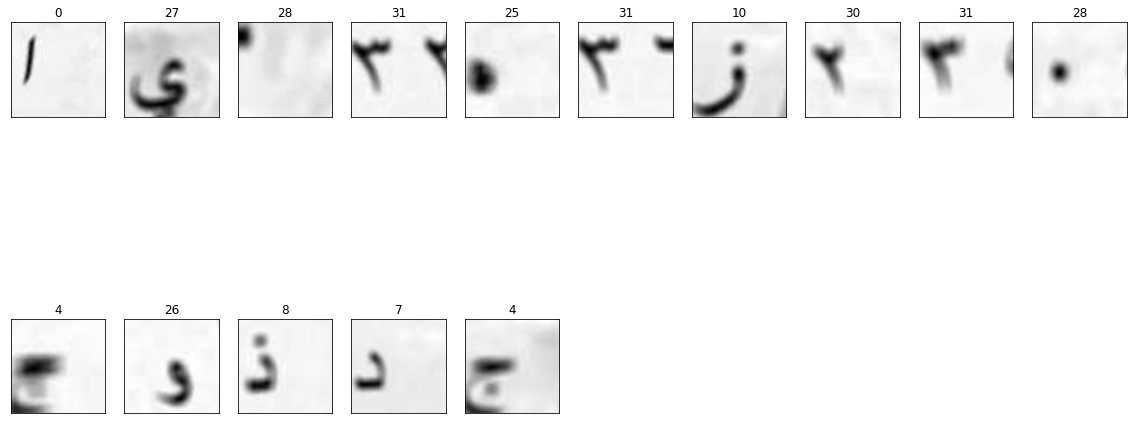

In [84]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 10))
# display 15 images
for idx in range(15):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]])


# Defining model

### Loss Function & Optimizer

In [85]:
import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss()
def get_optimizer(model):
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    return optimizer

## Training & Testing Algorithms

In [94]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## record the average training loss, using something like
            optimizer.zero_grad()
            output = model(data)
            loss=criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
             
    return model

In [95]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


### Model Architecture (VGG B-N)

In [86]:
import torchvision.models as models

In [87]:
vgg_model = models.vgg19_bn(pretrained=True)
print(vgg_model)

C:\Users\ZZ01H0865\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\ZZ01H0865\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [88]:
# freeze all weights
for param in vgg_model.features.parameters():
    param.requires_grad = False

In [89]:
vgg_model.classifier[6] = torch.nn.Linear(vgg_model.classifier[6].in_features,38)
print(vgg_model.classifier[6])

Linear(in_features=4096, out_features=38, bias=True)


## Resnet Model

In [90]:
resnet_model = models.resnext50_32x4d(pretrained=True)
print(resnet_model)

C:\Users\ZZ01H0865\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [91]:
# by default the paramteres are freezed except the classification parameters
print(resnet_model.fc)
resnet_model.fc = torch.nn.Linear(resnet_model.fc.in_features,38)
print(resnet_model.fc)

Linear(in_features=2048, out_features=1000, bias=True)
Linear(in_features=2048, out_features=38, bias=True)


## From scratch model

In [104]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN

        self.conv1 = nn.Conv2d(3,32,5,padding='same')
        self.conv2 = nn.Conv2d(32,64,3,padding='same')
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(56*56*64,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,38)
        
    
    def forward(self, x):
        ## Define forward behavior
        x=self.pool(F.tanh(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,56*56*64)      
        x=F.dropout(F.leaky_relu(self.fc1(x),0.3),p=0.2)
        x=F.dropout(F.leaky_relu(self.fc2(x),0.2),p=0.5)
        x=F.softmax(self.fc3(x))
      
        return x

# instantiate the CNN
scratch_model = Net()

In [103]:
# weight initialization
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if classname.find('Linear') !=-1:
        n=m.in_features
        y=1.0 / np.sqrt(n)
        m.weight.data.normal_(0,y)
        m.bias.data.fill_(0)
        
scratch_model.apply(custom_weight_init)

torch.Size([15, 64, 56, 56])


C:\Users\ZZ01H0865\AppData\Local\Temp\ipykernel_7940\103364927.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.softmax(self.fc3(x))


torch.Size([15, 64, 56, 56])
torch.Size([15, 64, 56, 56])
torch.Size([15, 64, 56, 56])
torch.Size([15, 64, 56, 56])


KeyboardInterrupt: 

## Model training and evaluation

In [ ]:
vgg_model = train(50, data_loaders, vgg_model, get_optimizer(vgg_model), 
                      criterion, False, 'vgg_model.pt')

# load the model that got the best validation accuracy
vgg_model.load_state_dict(torch.load('model.pt'))

In [ ]:
resnet_model = train(50, data_loaders, resnet_model, get_optimizer(resnet_model), 
                      criterion, False, 'resnet_model.pt')
# load the model that got the best validation accuracy
resnet_model.load_state_dict(torch.load( 'resnet_model.pt'))

In [ ]:
scratch_model = train(20, data_loaders, scratch_model, get_optimizer(scratch_model),
                      criterion, False, 'scratch_model.pt')
scratch_model.load_state_dict(torch.load( 'scratch_model.pt'))

In [ ]:
test(data_loaders, vgg_model, criterion, use_cuda=False)

In [ ]:
test(data_loaders, resnet_model, criterion, use_cuda=False)

In [105]:
test(data_loaders, scratch_model, criterion, use_cuda=False)

C:\Users\ZZ01H0865\Anaconda3\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\ZZ01H0865\AppData\Local\Temp\ipykernel_7940\3594635375.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.softmax(self.fc3(x))


KeyboardInterrupt: 